# Analysis of World Population Data by continents

## Importing required libraries

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Read Csv file from Google Drive

In [230]:
# From https://drive.google.com/file/d/181fFa4h4EigLpMlyu3DXaptm41tXVrNS/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=181fFa4h4EigLpMlyu3DXaptm41tXVrNS",
    index_col=0,
)
df.head(1)

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,health,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,82.9,88.0,5.8,6.8,108.0,915,26.2,77.0,85.0,100.0,...,52.0,NaN,NaN,NaN,174.0,160.0,74.4,61.1,24.5,23.8


In [231]:
# use reset_index() to move the country from index to col so it could be used as col in dataset
pop= df.reset_index()
pop.head(1)

,country,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
0,Hong Kong,82.9,88.0,5.8,6.8,108.0,915,26.2,77.0,85.0,...,52.0,NaN,NaN,NaN,174.0,160.0,74.4,61.1,24.5,23.8


#Including Countries-Continents dataset

In [232]:
#importing new dataset from Github that maps countries to continents for better visualizations
url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
countries_continents = pd.read_csv(url)
countries_continents.head(1)


,Continent,Country
0,Africa,Algeria


#Renaming columns in Countries-Continents dataset preparing it to to merge with World population dataset

In [233]:
#rename col countery to Country making sure it's the same in both datasets
countries_continents= countries_continents.rename(columns = {"Continent":"continent","Country":"country"})

#Merge both data sets

In [234]:
#merge both datasets on col "Country"
population = pd.merge(countries_continents,pop,on='country')
population.head(1)

,continent,country,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
0,Africa,Algeria,75.9,78.3,22.8,4.7,82.0,109,26.5,35.0,...,37.0,NaN,NaN,NaN,174.0,162.0,74.6,69.4,24.7,26.5


In [235]:
#list of continents in dataset
population['continent'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [236]:
population.head(1)

,continent,country,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
0,Africa,Algeria,75.9,78.3,22.8,4.7,82.0,109,26.5,35.0,...,37.0,NaN,NaN,NaN,174.0,162.0,74.6,69.4,24.7,26.5


In [237]:
#population.info()

In [238]:
#population.query('continent=="Oceania"').dropna().reset_index()

In [239]:
#population.isna().sum()

In [240]:
#population.shape

In [241]:
#population.dropna().shape

# **Hypothesis**

# **Hypothesis** **1**

#Maybe the higher temperature the higher the birth rates


In [242]:
# @title
#In this Hypothesis I will work with Four columns : 'continent','country','daily_max_temp','birth_rate'

#section the required columns of dataset and remove all NA values to create new clean dataset
cleaned_sub_df=population[['continent','country','daily_max_temp','birth_rate']].dropna()

#create a dataframe with the count of countries in each conteinent
countries_per_continent_count= cleaned_sub_df.groupby('continent')['country'].count().reset_index()

#find average daily max temp and average birth rates per continent
birth_temp_continents= cleaned_sub_df.groupby('continent')[['daily_max_temp','birth_rate']].mean().round().\
sort_values(by='continent',ascending=True).reset_index()

#add col country_count to the cleaned dataset
birth_temp_continents['country_count']= countries_per_continent_count.country

#final daraframe that include the avg percent of birth rate per avg temp ofr each continent
avg_birth_continents_df=birth_temp_continents.sort_values(by='daily_max_temp',ascending=False).reset_index()
avg_birth_continents_df


,index,continent,daily_max_temp,birth_rate,country_count
0,0,Africa,30.0,29.0,17
1,1,Asia,28.0,17.0,28
2,5,South America,27.0,16.0,7
3,4,Oceania,24.0,14.0,3
4,3,North America,22.0,13.0,3
5,2,Europe,16.0,10.0,32


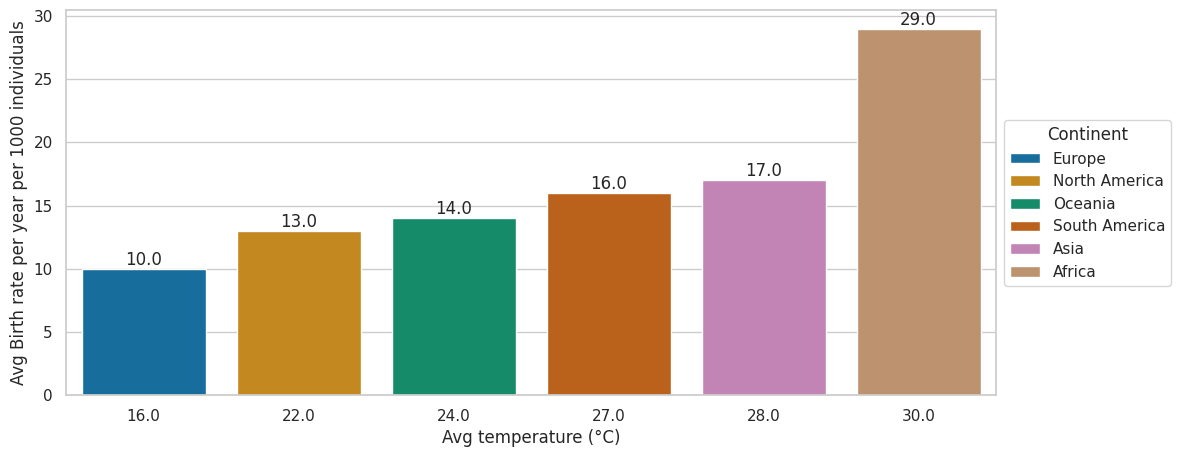

In [243]:
# Generate a custom color palette using the "colorblind" colormap with a number of colors equal to the number of bars in the plot
custom_palette = sns.color_palette("colorblind", len(avg_birth_continents_df))

# Configure plot size
plt.figure(figsize=(12, 5))

# Bar plot with custom palette and hue
ax = sns.barplot(
    data=avg_birth_continents_df.sort_values(by='daily_max_temp', ascending=False),
    x='daily_max_temp',
    y='birth_rate',
    hue='continent',
    palette=custom_palette,
    dodge=False)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

# Customize the plot
plt.xlabel("Avg temperature (°C)")
plt.ylabel("Avg Birth rate per year per 1000 individuals")
plt.legend(title='Continent', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


#Conclusion
**Yes, the higer the temprature the higher the birth rate**

# **Hypothesis** **2**

#Maybe the higher the IQ the higher the Stability

In [244]:
# @title
#In this Hypothesis I will work with Three columns : 'continent','country','iq' and 'stability'

#section the required col of dataset and remove all NA values to create new clean dataset
population_cleaned = population[['continent','country','iq','stability']].dropna()

#create a dataframe with the count of countries in each conteinent
countries_count= population_cleaned.groupby('continent')['country'].count().reset_index() #check how many country per continent to validate the output

#Find avg IQ and avg Satability for continents
continent_population_temp = population_cleaned.groupby(['continent'])[['iq','stability']].mean().reset_index()

#add col country_count to the cleaned dataset
continent_population_temp['country_count']= countries_count.country

continent_population_stable=continent_population_temp.sort_values(by='iq',ascending=False).reset_index()
continent_population_stable

,index,continent,iq,stability,country_count
0,4,Oceania,99.500000,88.500000,2
1,2,Europe,95.781250,71.062500,32
2,3,North America,91.000000,66.666667,3
3,1,Asia,87.481481,55.370370,27
4,5,South America,85.333333,51.500000,6
5,0,Africa,69.588235,39.470588,17


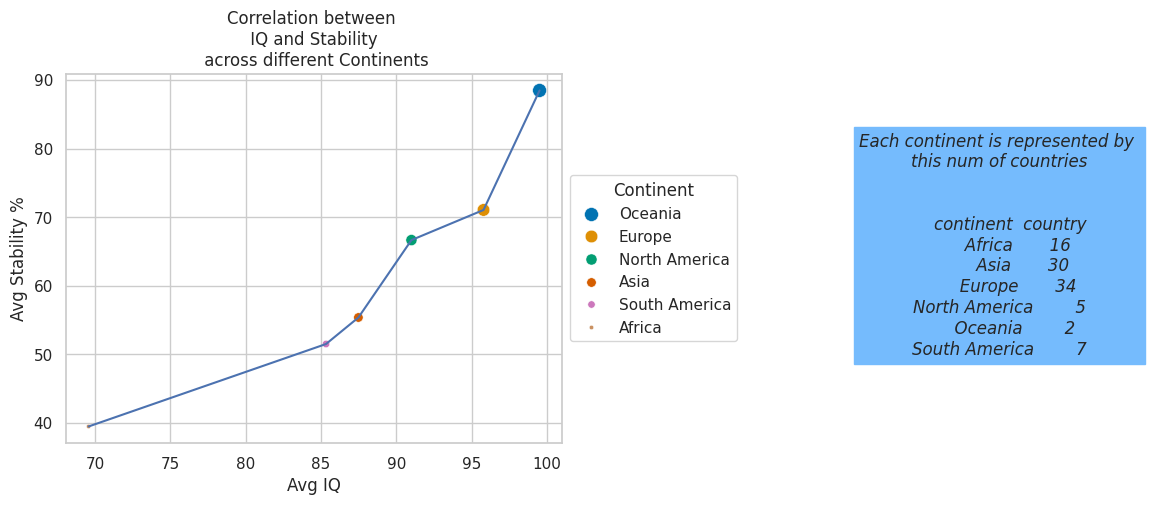

In [245]:
# @title

#ploting table findings
scatter_ax= sns.scatterplot(data=continent_population_stable, x='iq', y='stability', hue='continent',sizes=(10, 100),size="continent",legend="full", palette="colorblind")
line_ax= sns.lineplot(data=continent_population_stable, x='iq', y='stability')

# Customize the plot
ax = plt.gca()
ax.set_title("Correlation between \n IQ and Stability \n across different Continents")
ax.set_xlabel("Avg IQ")
ax.set_ylabel("Avg Stability %")

scatter_ax.legend(title='Continent',loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title='Continent',loc='center left', bbox_to_anchor=(1, 0.5))
plt.text(130,50, f'Each continent is represented by \nthis num of countries\n\n\n{country_count.to_string(index=False)}',ha='center',
         backgroundcolor='xkcd:sky blue',multialignment='center',fontstyle='oblique')

plt.show()

#Conclusion


**Yes, The Higher the IQ the Higher the Stability,**
but it's important to ntoice the how many countries per cotinent to validate this data
so for example we can see here that Oceania has the hights IQ average and avg stability but in this data it is only represented by two countries
which may affect the percentage.

# **Hypothesis** **3**

#Maybe the more to spend on education the more individuals become stable



In [246]:
#In this Hypothesis I will work with Four columns : 'continent','country','education_expenditure_per_inhabitant' and 'stability'
population[['continent','country','education_expenditure_per_inhabitant','stability']].head(1)

,continent,country,education_expenditure_per_inhabitant,stability
0,Africa,Algeria,109,35.0


In [247]:
#From exploring the four columns I can see that 'education_expenditure_per_inhabitant'is a numeric value stored in an object format
population[['continent','country','education_expenditure_per_inhabitant','stability']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   continent                             154 non-null    object 
 1   country                               154 non-null    object 
 2   education_expenditure_per_inhabitant  92 non-null     object 
 3   stability                             126 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


In [248]:
#make a copy of Population dataframe to clean the data
education_stability_df=population.copy()

#convert object values to floats and Remove ',' from any values
education_stability_df['education_expenditure_per_inhabitant'] = education_stability_df.loc[:,'education_expenditure_per_inhabitant'].\
str.replace(',', '').astype(float)

#section the required col of dataset and remove all NA values to create new clean dataset
cleaned_education_stability_df=education_stability_df.loc[:,['continent','country','education_expenditure_per_inhabitant','stability']].\
dropna().reset_index()

#Find avg cost spent on education per person and avg stability for diffrent continents
avg_education_stability_df = cleaned_education_stability_df.groupby('continent')[['education_expenditure_per_inhabitant','stability']].\
mean().round().reset_index()


#add col country_count to the cleaned dataset
country_count= cleaned_education_stability_df.groupby('continent')['country'].count().reset_index()
avg_education_stability_df['country_count']=country_count.country
avg_education_stability_df=avg_education_stability_df.sort_values(by='education_expenditure_per_inhabitant',ascending=False).reset_index()

avg_education_stability_df

,index,continent,education_expenditure_per_inhabitant,stability,country_count
0,4,Oceania,1336.0,88.0,2
1,2,Europe,1149.0,72.0,31
2,3,North America,719.0,67.0,3
3,1,Asia,364.0,57.0,26
4,5,South America,162.0,52.0,6
5,0,Africa,66.0,41.0,16


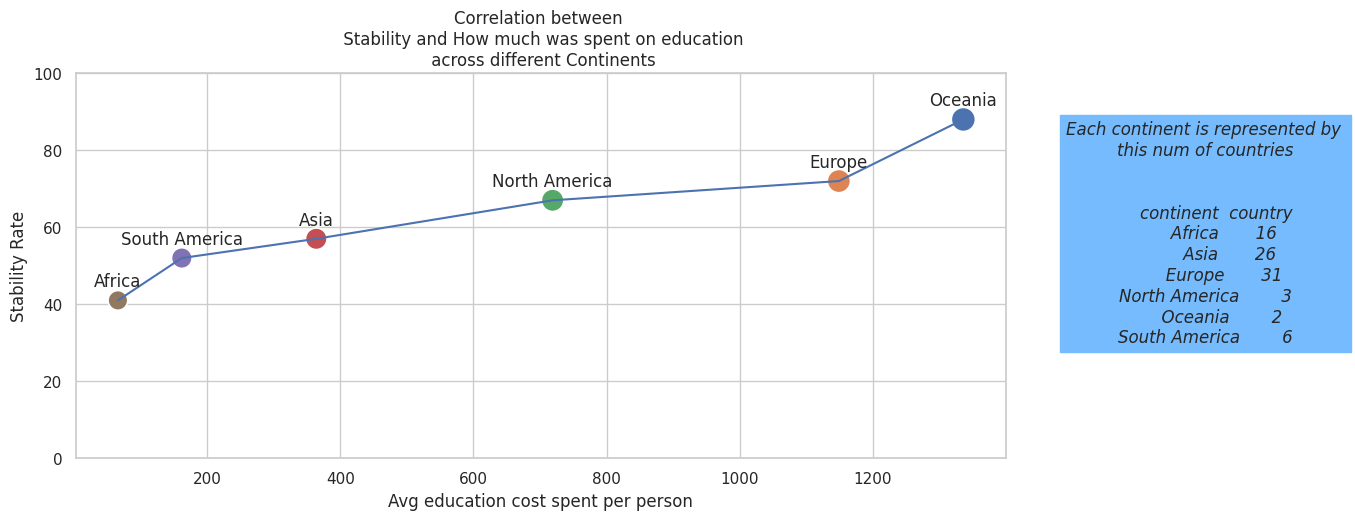

In [249]:
# @title
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

#sns.histplot(data=cleaned_education_stability_df, x='education_expenditure_per_inhabitant', y='stability',hue='continent',element="step",stat="density", common_norm=False)
ax= sns.scatterplot(data=avg_education_stability_df, x='education_expenditure_per_inhabitant',
                y='stability',hue='continent',sizes=(200, 300),size="continent",legend="full")
ax=sns.lineplot(data=avg_education_stability_df, x='education_expenditure_per_inhabitant', y='stability')

##Annotate specific data points
for i in range(len(avg_education_stability_df['education_expenditure_per_inhabitant'])):
    x = avg_education_stability_df['education_expenditure_per_inhabitant'][i]
    y = avg_education_stability_df['stability'][i]
    label = avg_education_stability_df.continent[i]

    # Add a label to the data point
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize the plot
plt.title("Correlation between \n Stability and How much was spent on education\n across different Continents")
plt.xlabel("Avg education cost spent per person")
plt.ylabel("Stability Rate")
plt.legend().set_visible(False)
#plt.legend(title='Continent',loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(0,100)
plt.text(1700, 30, f'Each continent is represented by \nthis num of countries\n\n\n{country_count.to_string(index=False)}',ha='center',
         backgroundcolor='xkcd:sky blue',multialignment='center',fontstyle='oblique')


plt.show()

#Conclusion

**Yes, The more spent money on education the higher stability rate**
.Taking into consideration how many contries per continent for this dataset.

# **Hypothesis** **4**

#Maybe the higher the stability the higher the birth rates



In [250]:
#In this Hypothesis I will work with Four columns : 'continent','country','stability','birth_rate'

#section the required col of dataset and remove all NA values to create new clean dataset
cleaned_birthRate_stability_df = population[['continent','country','stability','birth_rate']].dropna()#.sort_values(by='continent',ascending=True)

#create a dataframe with the count of countries in each conteinent
country_count=cleaned_birthRate_stability_df.groupby('continent')['country'].count().reset_index()

#Find avg birth rates and avg Satability for continents
birthRate_stability_temp = cleaned_birthRate_stability_df.groupby(['continent'])[['stability','birth_rate']].mean().\
round().sort_values(by='continent',ascending=True).reset_index()

#add col country_count to the cleaned dataset
birthRate_stability_temp['country_count']=country_count.country

avg_stability_birthRates_df=birthRate_stability_temp.sort_values(by='stability',ascending=False).reset_index()
avg_stability_birthRates_df

,index,continent,stability,birth_rate,country_count
0,4,Oceania,88.0,11.0,2
1,2,Europe,71.0,10.0,34
2,3,North America,63.0,15.0,5
3,1,Asia,56.0,17.0,30
4,5,South America,52.0,16.0,7
5,0,Africa,38.0,31.0,16


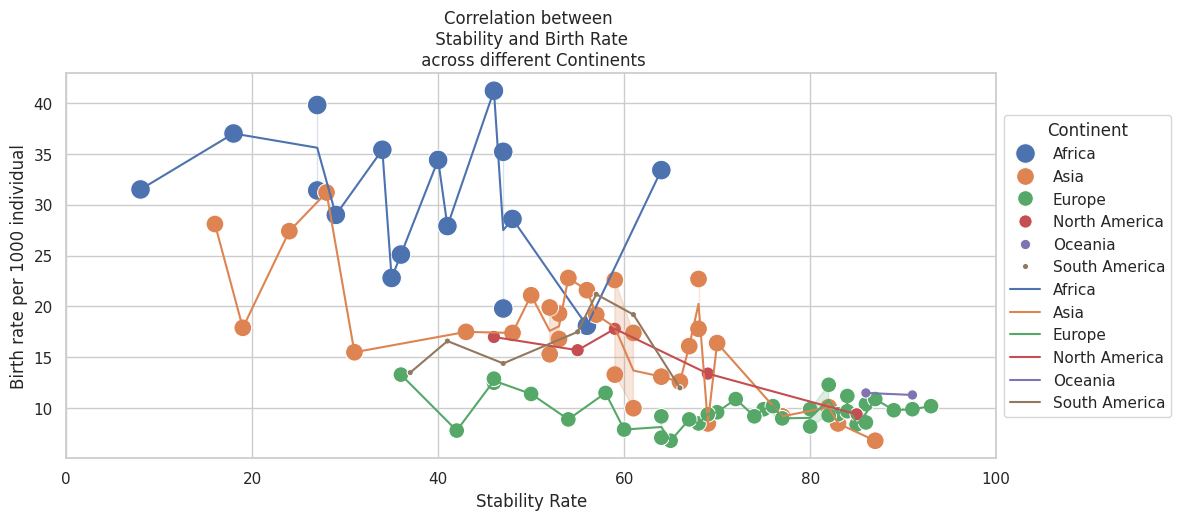

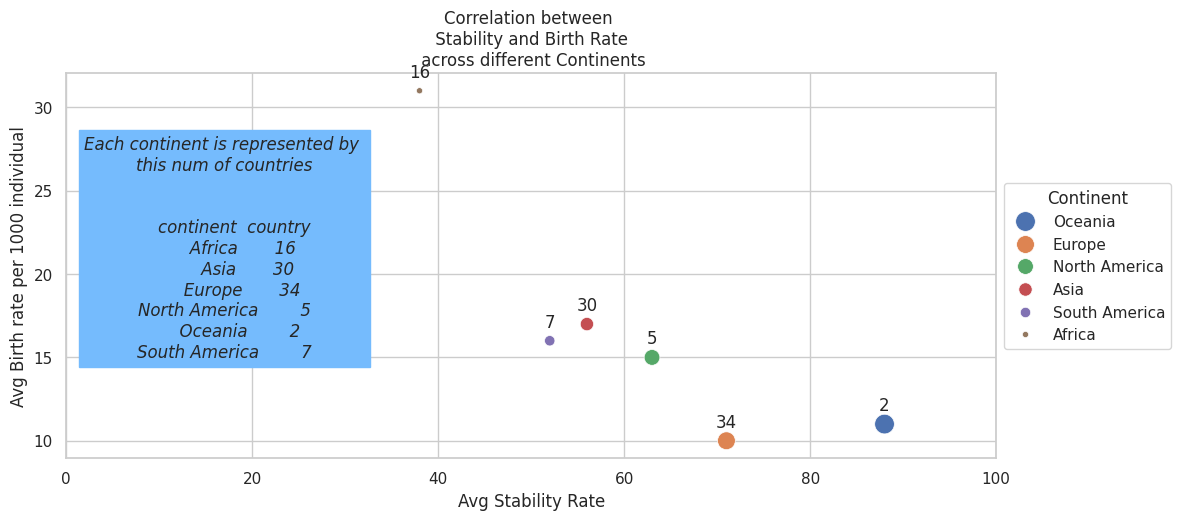

<Figure size 640x480 with 0 Axes>

In [251]:
#plot1
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

sns.set(style="whitegrid")
sns.scatterplot(data=cleaned_birthRate_stability_df, x='stability', y='birth_rate',hue='continent',sizes=(20, 200),size="continent",legend="full")
sns.lineplot(data=cleaned_birthRate_stability_df, x='stability', y='birth_rate',hue='continent')

# Customize the plot
plt.title("Correlation between \n Stability and Birth Rate \n across different Continents")
plt.xlabel("Stability Rate")
plt.ylabel("Birth rate per 1000 individual")
plt.legend(title='Continent',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,100)
#plt.tight_layout()
plt.show()


#Plot2
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

sns.set(style="whitegrid")
ax=sns.scatterplot(data=avg_stability_birthRates_df, x='stability', y='birth_rate',hue='continent',sizes=(20, 200),size="continent",legend="full")

##Annotate specific data points
for i in range(len(avg_stability_birthRates_df['stability'])):
    x = avg_stability_birthRates_df['stability'][i]
    y = avg_stability_birthRates_df['birth_rate'][i]
    label = avg_stability_birthRates_df.country_count[i]

    # Add a label to the data point
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize the plot
plt.title("Correlation between \n Stability and Birth Rate \n across different Continents")
plt.xlabel("Avg Stability Rate")
plt.ylabel("Avg Birth rate per 1000 individual")
plt.legend(title='Continent',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,100)
#plt.tight_layout()


#textbox
plt.text(17, 15, f'Each continent is represented by \nthis num of countries\n\n\n{z.to_string(index=False)}',ha='center',
         backgroundcolor='xkcd:sky blue',multialignment='center',fontstyle='oblique')
plt.show()

plt.tight_layout()


<Axes: >

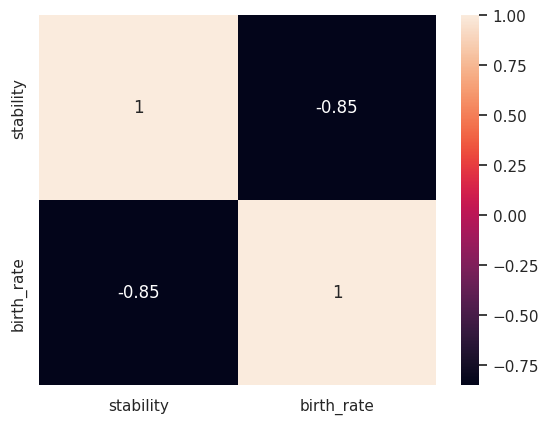

In [252]:
#sns.heatmap(avg_stability_birthRates_df.corr(),xticklabels=True,yticklabels=True,annot=True)
#Drop the 'continent' column before computing the correlation matrix
corr_df = avg_stability_birthRates_df.drop(columns=['continent','country_count','index']).corr()

sns.heatmap(corr_df, xticklabels=True, yticklabels=True, annot=True)

#Conclusion

According to the visiualization I can not find a decisive answer as it depends on the continent\n

From the heatmap I can see that stability and birth rate are strong negatively corelated and based on that **No, The Higher the Stability the Lower Birth Rates**